In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


In [105]:
data_fake = pd.read_csv('WELFake_Dataset.csv.csv')

In [106]:
data_fake.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [107]:
data_fake.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [108]:
data_fake["class"] = 0

In [109]:
data_fake.shape

(72134, 5)

In [110]:
data_fake['text'].fillna('', inplace=True)

In [111]:
X = data_fake['text']
y = data_fake['label']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [114]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fit the model with training data
lr.fit(X_train_vectorized, y_train)

D:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
pred_lr = lr.predict(X_test_vectorized)

In [94]:
X_test_vectorized = vectorizer.transform(X_test)
pred_lr = lr.predict(X_test_vectorized)

In [95]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      8726
           1       0.95      0.97      0.96      9308

    accuracy                           0.96     18034
   macro avg       0.96      0.96      0.96     18034
weighted avg       0.96      0.96      0.96     18034



In [96]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [97]:
pred_dt = DT.predict(X_test_vectorized)

In [98]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8726
           1       0.91      0.94      0.93      9308

    accuracy                           0.92     18034
   macro avg       0.93      0.92      0.92     18034
weighted avg       0.93      0.92      0.92     18034



In [99]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


nb.fit(X_train_vectorized, y_train)


pred_nb = nb.predict(X_test_vectorized)


print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8726
           1       0.90      0.88      0.89      9308

    accuracy                           0.89     18034
   macro avg       0.89      0.89      0.89     18034
weighted avg       0.89      0.89      0.89     18034



In [100]:
y_pred_nb = nb.predict(X_test_vectorized)
y_pred_lr = lr.predict(X_test_vectorized)
y_pred_dt = DT.predict(X_test_vectorized)

In [101]:
acc_nb = accuracy_score(X_test, y_pred_nb)
acc_lr = accuracy_score(X_test, y_pred_lr)
acc_dt = accuracy_score(X_test, y_pred_dt)

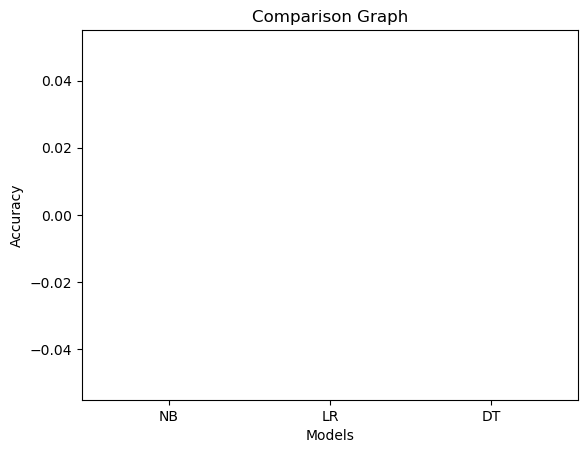

In [146]:
plt.bar(['NB', 'LR', 'DT'], [acc_nb, acc_lr, acc_dt])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison Graph')
plt.show()